In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

### Warm-up

* Which supervised learning method's loss function is shown below? ($SSE$ is Sum of Squared Errors & $\beta_i$ is the $i$th coefficient of the model)
    * (A) Logisitic Regression
    * (__B__) LASSO Regression
    * (C) Ridge Regression
    * (D) ElasticNet Regression

$$SSE + \lambda \sum_{i=1}|\beta_i|$$

* Bonus for above, this method can also be referenced as "\_\_\_\_\_ Regularization"
    * (__A__) L1
    * (B) L2
    * (C) A1
    * (D) B4

---

* Which supervised learning method's loss function is shown below? ($SSE$ is Sum of Squared Errors & $\beta_i$ is the $i$th coefficient of the model)
    * (A) Logisitic Regression
    * (B) LASSO Regression
    * (__C__) Ridge Regression
    * (D) ElasticNet Regression

$$SSE + \lambda \sum_{i=1}\beta_i^2$$

* Bonus for above, this method can also be referenced as "\_\_\_\_\_ Regularization"
    * (A) L1
    * (__B__) L2
    * (C) A1
    * (D) B4

----

Some code for the remaining questions:

```python
import numpy as np

y_test = np.array([ 6, -2, -4, 6,  -7])
y_pred = np.array([ 4,  4, -3, 9, -30])

mae = np.mean(np.abs(y_pred - y_test))
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
```

* What are the differences between the 2 in general?
  * RMSE adds a bigger penalty for larger mistakes ($L_2$).  MAE weights all mistakes equally ($L_1$).
* Why do we have multiple metrics for error?
  * Sometimes we want to care more about minimizing big mistakes.  Other times we care about minimizing all mistakes even if it means some big ones show up every now and then.  This is the same reason we'll see multiple distances today. 
----

We're talking about distances today as if they're something new, but keep in mind you've been doing some distance calculations already: 
* Sometimes more explicitly - like when checking model performance by calculating MAE/RMSE (average distance between `y_pred` & `y_test`)
* Sometimes less explicitly - like when using LASSO/Ridge/ElasticNet (distance between coefficients and 0)
* Sometimes it was the whole point of the method - KNN (distance between observation and its nearest neighbors)

In [5]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

## Distances for continuous data

Resource that has plans to include all the distances we'll cover: https://adamspannbauer.github.io/distance_metrics_demo/

In [3]:
df = pd.DataFrame(
    [[1, 30, 0, 3, 80000], [2, 32, 0, 4, 77000], [3, 55, 3, 12, 81000]],
    columns=["id", "age", "n_children", "education", "income"],
)

df

,id,age,n_children,education,income
0,1,30,0,3,80000
1,2,32,0,4,77000
2,3,55,3,12,81000


<IPython.core.display.Javascript object>

* Who are the most similar intuitively?
* Calculate the distance between each row to support/refute your intuition.
    * We'll calculate these first few 'by hand' and then use an imported function later.

In [4]:
scaled_df = scale(df)

first_row = scaled_df[0, :]
second_row = scaled_df[1, :]
third_row = scaled_df[2, :]

<IPython.core.display.Javascript object>

In [5]:
np.sqrt(np.sum((first_row - second_row) ** 2))

2.169819470348307

<IPython.core.display.Javascript object>

In [6]:
np.sqrt(np.sum((first_row - third_row) ** 2))

4.549375504885614

<IPython.core.display.Javascript object>

In [7]:
np.sqrt(np.sum((second_row - third_row) ** 2))

4.426631448589792

<IPython.core.display.Javascript object>

A more practical solution is use the `pdist` function from `scipy.spatial.distance`.

In [8]:
pdist(scaled_df)

array([2.16981947, 4.5493755 , 4.42663145])

<IPython.core.display.Javascript object>

Its often paired with the `squareform` function.

In [9]:
squareform(pdist(scaled_df))

array([[0.        , 2.16981947, 4.5493755 ],
       [2.16981947, 0.        , 4.42663145],
       [4.5493755 , 4.42663145, 0.        ]])

<IPython.core.display.Javascript object>

For a prettier print in jupyter you can convert to a dataframe.

In [10]:
pd.DataFrame(squareform(pdist(scaled_df)))

,0,1,2
0,0.000000,2.169819,4.549376
1,2.169819,0.000000,4.426631
2,4.549376,4.426631,0.000000


<IPython.core.display.Javascript object>

* What is the default method used in `pdist`?
* What other distance methods does `pdist` provide?

In [11]:
pd.DataFrame(squareform(pdist(scaled_df, metric="cityblock")))

,0,1,2
0,0.000000,3.414390,9.597671
1,3.414390,0.000000,9.713371
2,9.597671,9.713371,0.000000


<IPython.core.display.Javascript object>

An example to show why cosine distance makes sense.

Let's say the below data is some features made from 2 different blogs.  The way we created this data is by counting the number of times each word appeared in each blog.

One was a political blog talking about Donald Trump; the other was a game blog talking about the intricacies of a card game's 'trump card' mechanic.

In [12]:
text_df = pd.DataFrame({"trump": [20, 40], "card": [1, 45], "donald": [17, 0]})
text_df.index = ["blog1", "blog2"]
text_df

,trump,card,donald
blog1,20,1,17
blog2,40,45,0


<IPython.core.display.Javascript object>

The option to visualize that we've been using so far together:

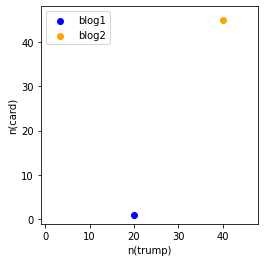

<IPython.core.display.Javascript object>

In [13]:
plt.scatter(text_df["trump"][0], text_df["card"][0], color="blue", label="blog1")
plt.scatter(text_df["trump"][1], text_df["card"][1], color="orange", label="blog2")

plt.axis("square")
plt.xlabel("n(trump)")
plt.ylabel("n(card)")
plt.xlim(-1, 48)
plt.ylim(-1, 48)
plt.legend(loc="upper left")
plt.show()

Another way to visualize/think about this is the data as vectors.  The beginnings of the vectors originate from the origin, and the tips of the vectors point to the location of our data as shown in the scatter plot.

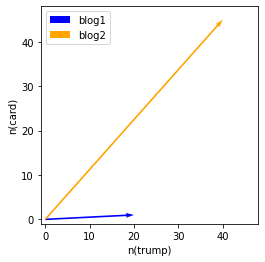

<IPython.core.display.Javascript object>

In [14]:
# fmt: off
plt.quiver(
    [0], [0],
    text_df["trump"][0], text_df["card"][0],
    color="blue", label="blog1",
    angles="xy", scale_units="xy", scale=1,
)
plt.quiver(
    [0], [0],
    text_df["trump"][1], text_df["card"][1],
    color="orange", label="blog2",
    angles="xy", scale_units="xy", scale=1,
)
# fmt: on
plt.axis("square")
plt.xlabel("n(trump)")
plt.ylabel("n(card)")
plt.xlim(-1, 48)
plt.ylim(-1, 48)
plt.legend(loc="upper left")
plt.show()

We now have the same style of data but for a shorter post.  Which blog is the post most similar to?

In [15]:
new_observation = pd.DataFrame(
    {"trump": [5], "card": [6], "donald": [0]}, index=["new_post"]
)

full_df = pd.concat((text_df, new_observation))
full_df

,trump,card,donald
blog1,20,1,17
blog2,40,45,0
new_post,5,6,0


<IPython.core.display.Javascript object>

A scatter plot makes our minds think more in terms of euclidean distance.

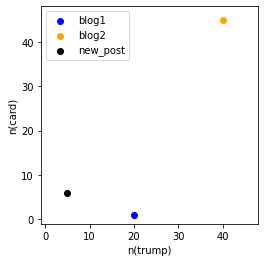

<IPython.core.display.Javascript object>

In [16]:
plt.scatter(full_df["trump"][0], full_df["card"][0], color="blue", label="blog1")
plt.scatter(full_df["trump"][1], full_df["card"][1], color="orange", label="blog2")
plt.scatter(
    full_df["trump"][2], full_df["card"][2], color="black", label="new_post",
)

plt.axis("square")
plt.xlabel("n(trump)")
plt.ylabel("n(card)")
plt.xlim(-1, 48)
plt.ylim(-1, 48)
plt.legend(loc="upper left")
plt.show()

A visual with a more vector representation of this data tells a different story of similarity/distance.

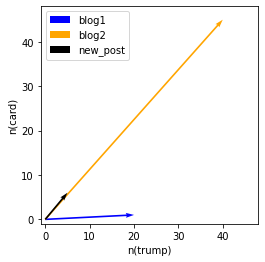

<IPython.core.display.Javascript object>

In [17]:
# fmt: off
plt.quiver(
    full_df["trump"][0], full_df["card"][0],
    color="blue", label="blog1",
    angles="xy", scale_units="xy", scale=1,
)
plt.quiver(
    full_df["trump"][1], full_df["card"][1],
    color="orange", label="blog2",
    angles="xy", scale_units="xy", scale=1,
)
plt.quiver(
    full_df["trump"][2], full_df["card"][2],
    color="black", label="new_post",
    angles="xy", scale_units="xy", scale=1,
)
# fmt: on
plt.axis("square")
plt.xlabel("n(trump)")
plt.ylabel("n(card)")
plt.xlim(-1, 48)
plt.ylim(-1, 48)
plt.legend(loc="upper left")
plt.show()

In [18]:
euclid_dist = squareform(pdist(full_df))
cosine_dist = squareform(pdist(full_df, metric="cosine"))

euclid_dist = pd.DataFrame(euclid_dist, columns=full_df.index, index=full_df.index)
cosine_dist = pd.DataFrame(cosine_dist, columns=full_df.index, index=full_df.index)

print("Original Data")
display(full_df)

print("\nEuclidean Distance")
display(euclid_dist)

print("\n1 - Cosine Similarity")
display(cosine_dist)

Original Data


,trump,card,donald
blog1,20,1,17
blog2,40,45,0
new_post,5,6,0



Euclidean Distance


,blog1,blog2,new_post
blog1,0.000000,51.234754,23.216374
blog2,51.234754,0.000000,52.402290
new_post,23.216374,52.402290,0.000000



1 - Cosine Similarity


,blog1,blog2,new_post
blog1,0.000000,0.465709,0.483326
blog2,0.465709,0.000000,0.000509
new_post,0.483326,0.000509,0.000000


<IPython.core.display.Javascript object>

In [19]:
pdist([[2, 3], [4, 6]], metric="cityblock")

array([5.])

<IPython.core.display.Javascript object>

### Numeric distance cheat sheet:

#### Manhattan distance

$$\sum_{i=0}^n|x_i - y_i|$$

* Intuition: "Taxi cab/city block distance" This metric will be less affected by outlier differences in the calculation than euclidean.
* Examples:
    * `manhattan([0,0], [3,4])` is 7
    * `manhattan([0,0], [3,10])` is 13
    * `manhattan([2,3], [4,6])` is 5
* Code: `pdist(x)` or `pdist(x, metric='euclidean')`
* "$L_1$ norm" (is minkowski distance ($L_p$) with $p=1$)


#### Euclidean distance

$$\sqrt{\sum_{i=0}^n(x_i - y_i)^2}$$

* Intuition: "Straight line distance." This metric will be more affected by outlier differences in the calculation than Manahattan (due to being squared).
* Examples:
    * `euclidean([0,0], [3,4])` is 5
    * `euclidean([0,0], [3,10])` is 10.44
    * `euclidean([2,3], [4,6])` is 3.606
* Code: `pdist(x)` or `pdist(x, metric='euclidean')`
* "$L_2$ norm" (is minkowski distance ($L_p$) with $p=2$)


#### Chebyshev distance

$$max(|x_i - y_i|)$$

* Intuition: "The biggest difference between the 2 rows." This metric is only affected by outlier differences in the calculation.  (it's only the max)
* Examples:
    * `chebyshev([0,0], [3,4])` is 4
    * `chebyshev([0,0], [3,10])` is 10
    * `chebyshev([2,3], [4,6])` is 3
* Code: `pdist(x)` or `pdist(x, metric='euclidean')`
* "$L_\infty$ norm" (is minkowski distance ($L_p$) with $p=\infty$)

#### Minkowski

All the above distances are versions of minkowski.  Plug in $p=1$ and $p=2$ to prove that's true ($p=\infty$ is a little tougher to prove).

$$\sqrt[p]{\sum_{i=0}^n|x_i - y_i|^p}$$

* As $p$ gets larger the greater the focus is on the biggest difference between $x$ and $y$.
    * In manahattan, $p=1$ and we weight each absolute difference the same.  For example, if we compare `[0, 0]` to `[3, 4]`, the differences are $3$ and $4$ and we simply add them up to get a distance of $7$.
    * In euclidean, $p=2$ and by squaring each difference we but a greater emphasis on larger differences.  For example, if we compare `[0, 0]` to `[3, 4]`, the differences are $2$ and $4$.  Squaring these leads to $2^2 = 4$ and $4^2 = 16$; this exagerates the importance of the larger difference and the final result is 
    * In chebyshev, $p=\infty$ and we *only* care about the biggest difference

#### Cosine disimilarity

Cosine similarity ranges from [-1, 1]; to convert this to a 'distance' we do 1 - cosine similarity.  So the new range is [2, 0].

$$cos(\theta) = \frac{x \cdotp y}{||x|| ||y||}$$

See [this YouTube playlist](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) for a deeper intuition of vectors and linear algebra.

* Intuition: "Angle between the vectors defined by each observation."  Focuses more on how each column relates to one another within each observation; if their relationships between columns are similar then this is a small distance.
* Examples:
    * `cosine_dis([0,0], [3,4])` is nan*
    * `cosine_dis([0,0], [3,10])` is nan*
    * `cosine_dis([0,0,1], [3,10,1])` is 0.904
    * `cosine_dis([2,3], [4,6])` is 0
* Code: `pdist(x, metric='cosine')`

*think about our plot above; we can't really draw a vector from (0, 0) to (0, 0) and measure the angle between that and another vector

## Distances for categorical data

### Scenario 1:

Which users are the most similar?

In [20]:
df = pd.DataFrame(
    {
        "subscriber": ["yes", "no", "no"],
        "dog_owner": ["yes", "yes", "no"],
        "cat_owner": ["yes", "yes", "no"],
        "smoker": ["yes", "yes", "yes"],
    },
    index=["user_1", "user_2", "user_3"],
)
df

,subscriber,dog_owner,cat_owner,smoker
user_1,yes,yes,yes,yes
user_2,no,yes,yes,yes
user_3,no,no,no,yes


<IPython.core.display.Javascript object>

Encode the data for an ML model to consume it:

* Does this encoding change how similar things look?
* In regards to comparing rows:
    * what does it mean when both rows have a `0`?
    * what does it mean when both rows have a `1`?
    * what does it mean when one row has a `0` and one row has a `1`?

### Scenario 2:

Which users are most similiar?

In [21]:
df = pd.DataFrame(
    {
        "region": ["west", "south", "south", "north", "east"],
        "favorite_show": [
            "office",
            "sportscenter",
            "office",
            "sportscenter",
            "bachelor",
        ],
        "music_service": ["spotify", "apple", "spotify", "pandora", "apple"],
        "favorite_planet": ["earth", "pluto", "earth", "pandora", "pluto"],
    },
    index=["user_1", "user_2", "user_3", "user_4", "user_5"],
)

df

,region,favorite_show,music_service,favorite_planet
user_1,west,office,spotify,earth
user_2,south,sportscenter,apple,pluto
user_3,south,office,spotify,earth
user_4,north,sportscenter,pandora,pandora
user_5,east,bachelor,apple,pluto


<IPython.core.display.Javascript object>

Encode the data for an ML model to consume it:

* Does this encoding change how similar things look?
* In regards to comparing rows:
    * what does it mean when both rows have a `0`?
    * what does it mean when both rows have a `1`?
    * what does it mean when one row has a `0` and one row has a `1`?
    
-----

### Categorical distance cheat sheet:

#### Hamming distance

$$\frac{n_{misses}}{n_{columns}}$$

* **Makes a lot of sense for binary columns where a `0` is a meaningful response.**
* Intuition: "What fraction of the elements between the 2 rows are differnt?"
* Examples:
    * `hamming([0,0,0], [1,1,1])` is $\frac{3}{3}$ = 1
    * `hamming([1,0,0], [1,1,1])` is $\frac{2}{3}$
    * `hamming([1,1,0], [1,1,1])` is $\frac{1}{3}$
    * `hamming([1,1,1], [1,1,1])` is $\frac{0}{3}$ = 0
    * `hamming([0,0,1], [0,0,0])` is $\frac{1}{3}$
    * `hamming([0,0,1], [0,1,1])` is $\frac{1}{3}$
* Code: `pdist(x, metric='hamming')` or `pdist(x, metric='matching')`


#### Dice dissimilarity

$$\frac{n_{misses}}{2n_{one\_matches} + n_{misses}}$$

* **Makes a lot of sense for dummy columns where a `0` is a less meaningful response, but matching on a 1 means a lot (i.e. a dummy matching on 1 means the original input categorical data matched).**
* Intuition: "Hamming distance but... ignore matches of `0`s and extra count matches of `1`s"
* Examples:
    * `dice([0,0,0], [1,1,1])` is $\frac{3}{2(0) + 3}$ = 1
    * `dice([1,0,0], [1,1,1])` is $\frac{2}{2(1) + 2}$ = $\frac{1}{2}$
    * `dice([1,1,0], [1,1,1])` is $\frac{1}{2(2) + 1}$ = $\frac{1}{5}$
    * `dice([1,1,1], [1,1,1])` is $\frac{0}{2(3) + 0}$ = 0
    * `dice([0,0,1], [0,0,0])` is $\frac{1}{2(0) + 1}$ = 1
    * `dice([0,0,1], [0,1,1])` is $\frac{1}{2(1) + 1}$ = $\frac{1}{3}$
* Code: `pdist(x, metric='dice')`


#### Jaccard distance

$$\frac{n_{misses}}{n_{one\_matches} + n_{misses}}$$

* **Makes a lot of sense for a mix of binary and dummy columns**
* Intuition: "What if there was a middle ground between hamming and dice?"
* Examples:
    * `jaccard([0,0,0], [1,1,1])` is $\frac{3}{0 + 3}$ = 1
    * `jaccard([1,0,0], [1,1,1])` is $\frac{2}{1 + 2}$ = $\frac{2}{3}$
    * `jaccard([1,1,0], [1,1,1])` is $\frac{1}{2 + 1}$ = $\frac{1}{3}$
    * `jaccard([1,1,1], [1,1,1])` is $\frac{0}{0 + 3}$ = 0
    * `jaccard([0,0,1], [0,0,0])` is $\frac{1}{0 + 1}$ = 1
    * `jaccard([0,0,1], [0,1,1])` is $\frac{1}{1 + 1}$ = $\frac{1}{2}$
* Code: `pdist(x, metric='jaccard')`

## Distance for mixed data

p much all gower

Gower distance is essentially a combination of manhattan distance and jaccard distance.  It applies manhattan to continuous variables and jaccard to binary variables.

In [3]:
!pip install gower
import gower

  Created wheel for gower: filename=gower-0.0.5-py3-none-any.whl size=4237 sha256=b3ad658ade6fd04193746badd032b8e9eec6d61d27dff334cf40b8289862409c
  Stored in directory: c:\users\dgump\appdata\local\pip\cache\wheels\3e\f9\9a\67122a959a424e9cbb4557a8366c871a30e31cd75f0d003db4
Successfully built gower


<IPython.core.display.Javascript object>

In [6]:
df = pd.DataFrame(
    {
        "age": [21, 24, 35, 52, 55],
        "account_age": [2, 3, 12, 20, 18],
        "region": ["west", "south", "west", "east", "east"],
        "late_payments": ["y", "n", "y", "n", "y"],
    }
)
df

,age,account_age,region,late_payments
0,21,2,west,y
1,24,3,south,n
2,35,12,west,y
3,52,20,east,n
4,55,18,east,y


<IPython.core.display.Javascript object>

The imported `gower` package wants to do all the preprocessing for us.

In [7]:
pd.DataFrame(gower.gower_matrix(df))

,0,1,2,3,4
0,0.000000,0.535948,0.241830,0.977941,0.722222
1,0.535948,0.000000,0.705882,0.691993,0.936275
2,0.241830,0.705882,0.000000,0.736111,0.480392
3,0.977941,0.691993,0.736111,0.000000,0.299837
4,0.722222,0.936275,0.480392,0.299837,0.000000


<IPython.core.display.Javascript object>

With this metric we also have the ability to assign weights to show how important each feature should be in the distance calculation.

In [8]:
# I think account age should be 5 times as important as the
# rest of the features (idk why, just made it up to use weights)
w = np.array([1, 1, 1, 5])
pd.DataFrame(gower.gower_matrix(df, weight=w))

,0,1,2,3,4
0,0.000000,0.767974,0.120915,0.988971,0.361111
1,0.767974,0.000000,0.852941,0.345997,0.968137
2,0.120915,0.852941,0.000000,0.868056,0.240196
3,0.988971,0.345997,0.868056,0.000000,0.649918
4,0.361111,0.968137,0.240196,0.649918,0.000000


<IPython.core.display.Javascript object>

Compare the 2 outputs.

`[0, 2, 4]` all had the same value for the more heavily weighted `late_payments` feature.  The distances between `[0, 2]`, `[0, 4]`, and `[2, 4]` all got smaller when we weighted that feature.


`[1, 3]` had the same value for `late_payments` feature.  The distances between `[1, 3]` got smaller.

We also see larger distances between these 2 groups (`[0, 2, 4]` <-> `[1, 3]`)